In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [25]:
X_train=X_train/255
X_test=X_test/255

In [26]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu', input_dim=784))
model.add(Dense(10,activation='softmax'))

C:\Users\jroun\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\jroun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [29]:
history =model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5409 - loss: 1.7590 - val_accuracy: 0.8525 - val_loss: 0.6454
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8530 - loss: 0.5903 - val_accuracy: 0.8924 - val_loss: 0.4240
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8817 - loss: 0.4344 - val_accuracy: 0.9032 - val_loss: 0.3570
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8987 - loss: 0.3684 - val_accuracy: 0.9084 - val_loss: 0.3259
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9028 - loss: 0.3462 - val_accuracy: 0.9144 - val_loss: 0.3071
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9082 - loss: 0.3257 - val_accuracy: 0.9162 - val_loss: 0.2961
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9118 - loss: 0.3044 - val_accuracy: 0.9180 - val_loss: 0.2832
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9167 - loss: 0.2945 - 

In [30]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


In [31]:
y_pred= y_prob.argmax(axis=1)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.922

In [33]:
import matplotlib.pyplot as plt

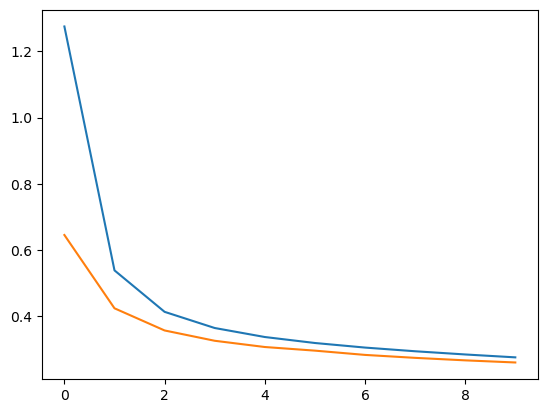

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

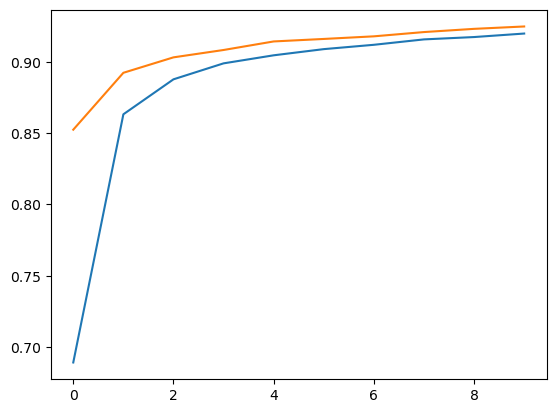

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [36]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([2], dtype=int64)

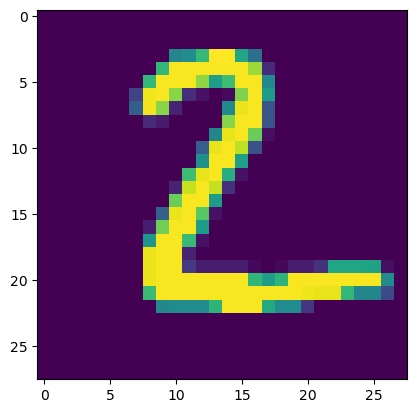

In [38]:
plt.imshow(X_test[1])